<a href="https://colab.research.google.com/github/Mark123252/App-Dev/blob/main/Copy_of_Concrete_Crack_Severity_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.) Dataset Preparation

In [ ]:
# 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Define the file path (adjust if needed)
zip_path = '/content/drive/MyDrive/Concrete Cracks/bs7rjwywfm-1.zip'

# 3️⃣ Unzip into the current directory (or a custom folder)
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/concrete_cracks_dataset')

print("✅ Dataset extracted to /content/concrete_cracks_dataset")


Mounted at /content/drive
✅ Dataset extracted to /content/concrete_cracks_dataset


In [ ]:
import os
os.listdir('/content/concrete_cracks_dataset')


['train dataset.7z']

In [ ]:
# 1️⃣ Install p7zip (fast extraction tool)
!apt-get install -y p7zip-full

# 2️⃣ Extract the .7z file
!7z x "/content/concrete_cracks_dataset/train dataset.7z" -o"/content/concrete_cracks_dataset/train"

print("✅ .7z file extracted to /content/concrete_cracks_dataset/train")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,12 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (50657),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/concrete_cracks_dataset/                                           1 file, 141705976 bytes (136 MiB)

Extracting archive: /content/concrete_cracks_dataset/train dataset.7z
--
Path = /content/concrete_cracks_dataset/train dataset.7z
Type = 7z
Physical Size = 141705976
Headers Size = 317575
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      2% 6        3% 634 - train dataset/High/3EikSE0.jpg

In [ ]:
import os
os.listdir('/content/concrete_cracks_dataset/train')


['train dataset']

In [ ]:
import os

train_path = '/content/concrete_cracks_dataset/train/train dataset'
print(os.listdir(train_path)[:20])  # Show first 20 items


['Medium', 'High', 'None', 'Low', 'Very high']


In [ ]:
import os, glob, pprint
from collections import Counter, defaultdict

# Update if your path differs
DATA_DIR = '/content/concrete_cracks_dataset/train/train dataset'  # contains subfolders: None, Low, Medium, High, Very high

# Gather classes (subfolders)
classes = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print("Found classes:", classes)

# Count images per class
exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp')
counts = {}
for c in classes:
    cdir = os.path.join(DATA_DIR, c)
    files = [f for f in os.listdir(cdir) if f.lower().endswith(exts)]
    counts[c] = len(files)

pprint.pprint(counts)



Found classes: ['High', 'Low', 'Medium', 'None', 'Very high']
{'High': 5000, 'Low': 5000, 'Medium': 5000, 'None': 5000, 'Very high': 5000}


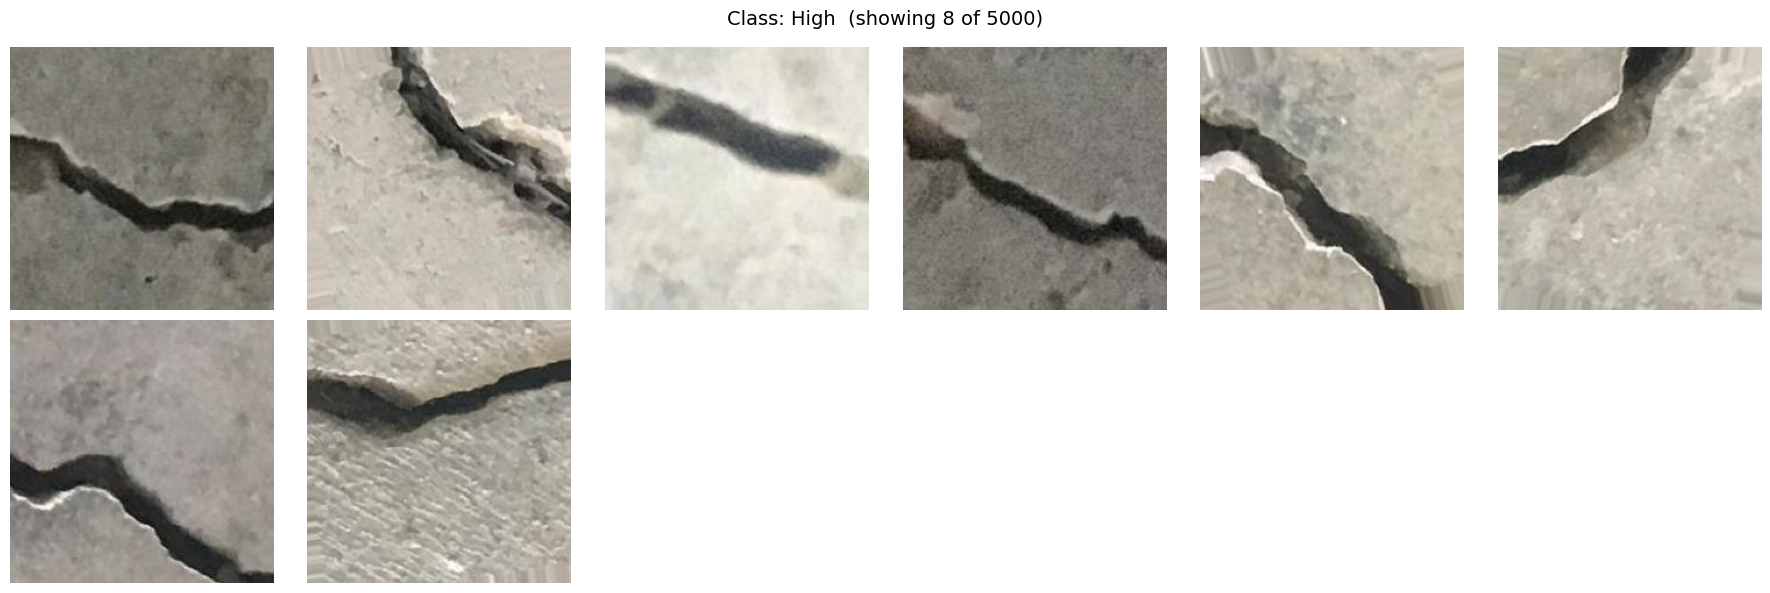

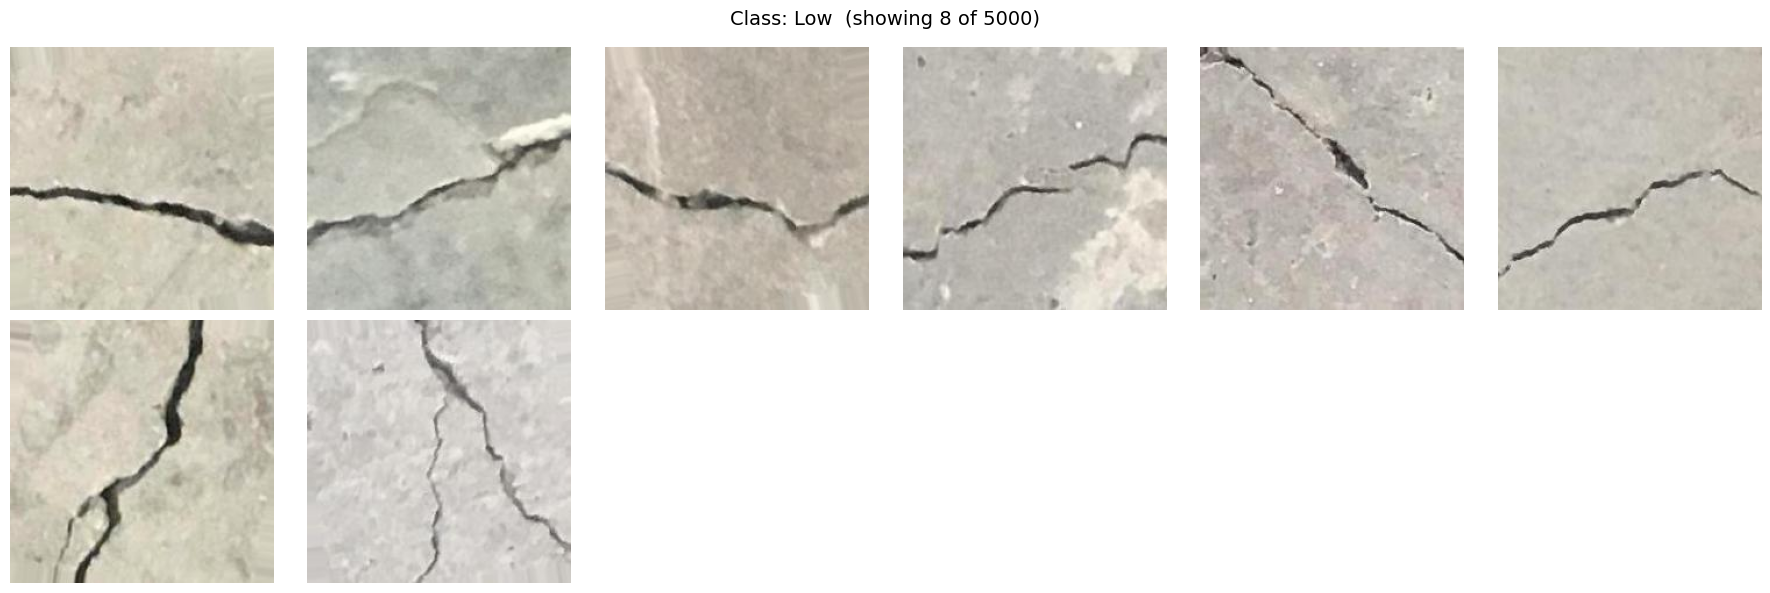

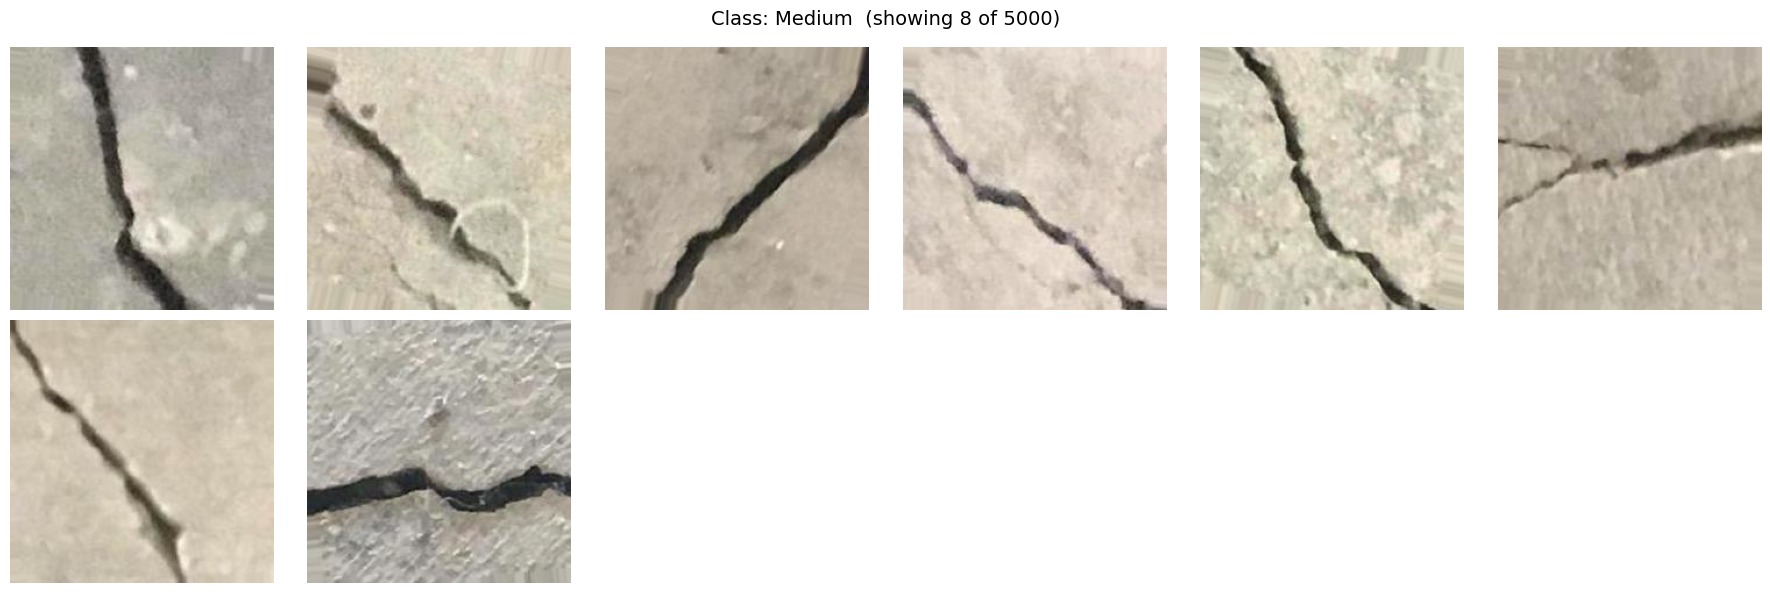

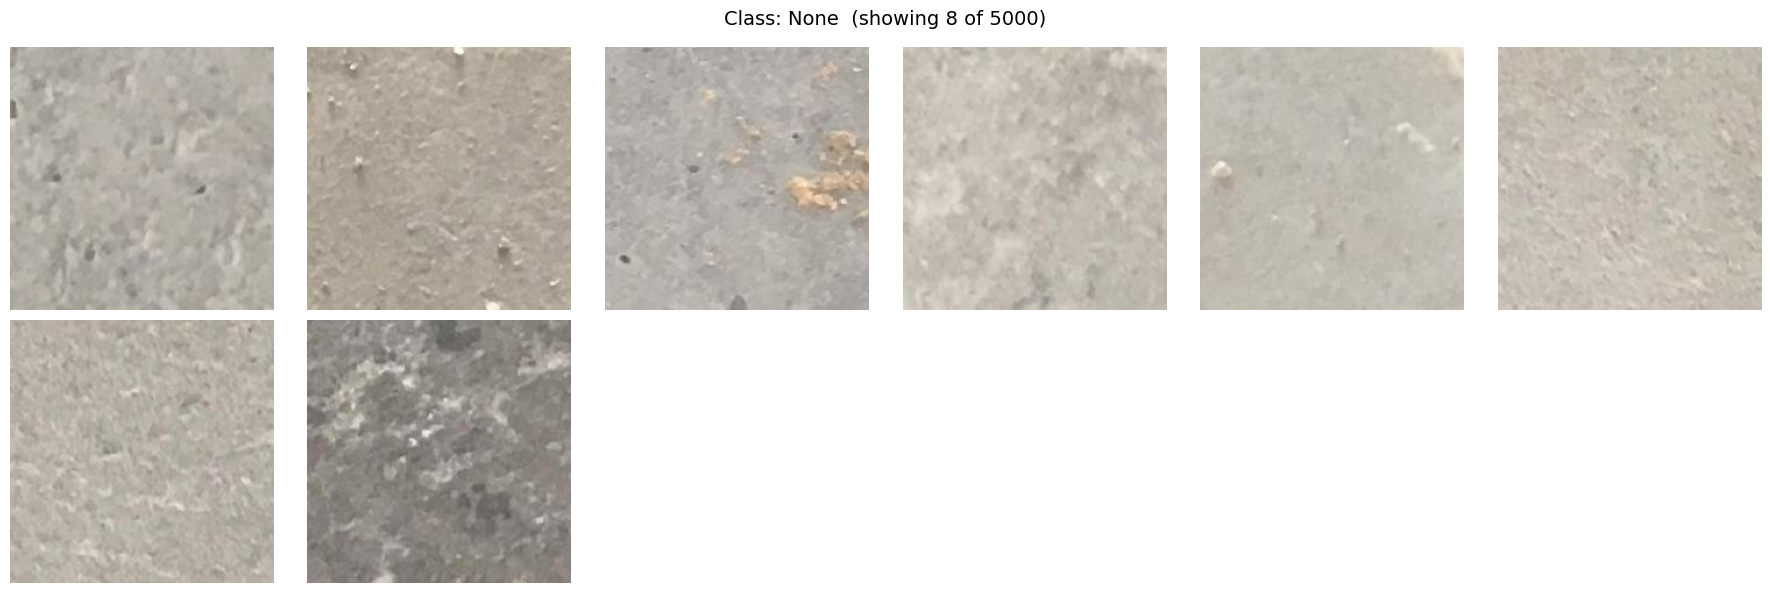

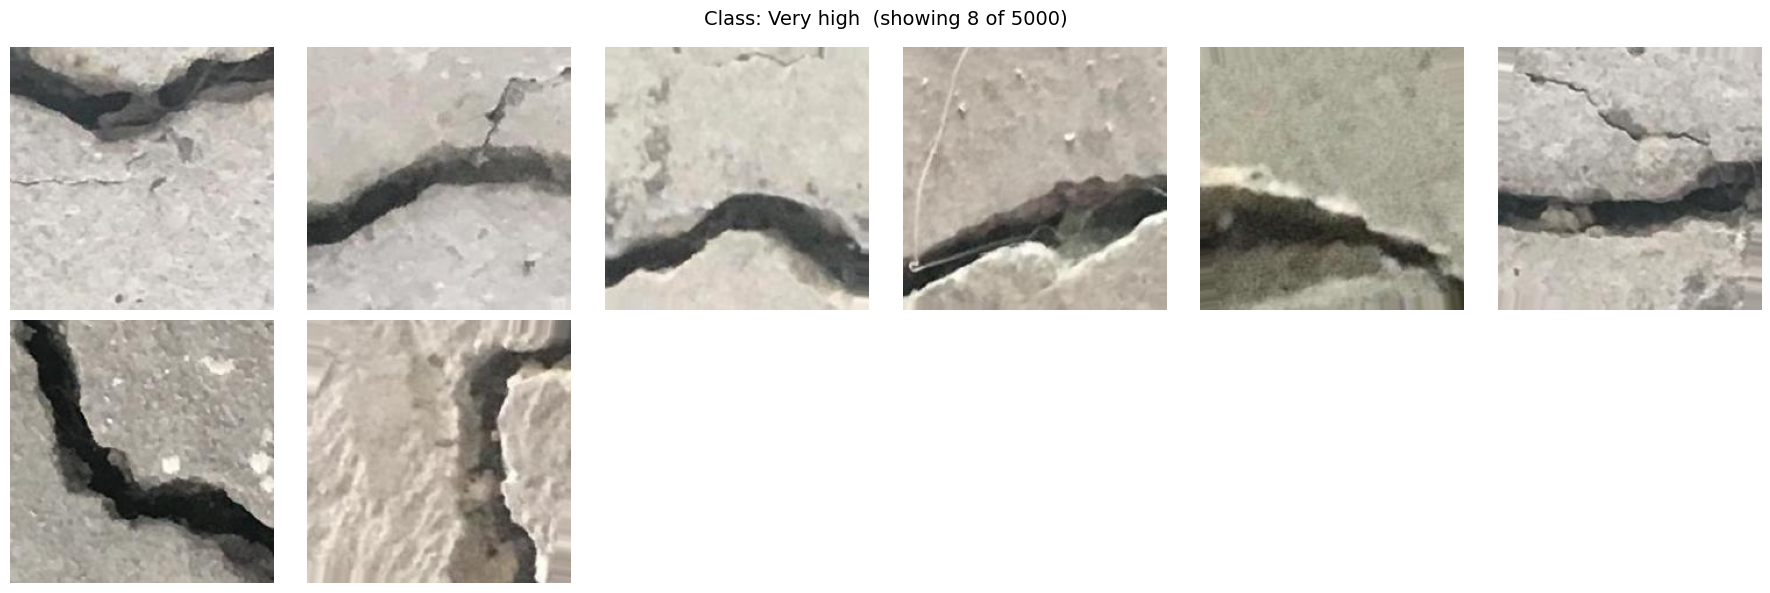

In [ ]:
import matplotlib.pyplot as plt
import cv2, random

def preview_per_class(base_dir=DATA_DIR, per_class=6):
    exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp')
    classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

    for c in classes:
        cdir = os.path.join(base_dir, c)
        files = [os.path.join(cdir, f) for f in os.listdir(cdir) if f.lower().endswith(exts)]
        if not files:
            print(f"[{c}] No images found.")
            continue

        sample = random.sample(files, min(per_class, len(files)))
        cols = min(6, len(sample))
        rows = (len(sample) + cols - 1) // cols
        plt.figure(figsize=(3*cols, 3*rows))
        plt.suptitle(f"Class: {c}  (showing {len(sample)} of {len(files)})", fontsize=14)
        for i, p in enumerate(sample):
            img = cv2.imread(p)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(rows, cols, i+1)
            plt.imshow(img)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

preview_per_class(DATA_DIR, per_class=8)


In [ ]:
import os, shutil, random

# Source folder (already extracted)
SOURCE_DIR = '/content/concrete_cracks_dataset/train/train dataset'

# Output folder for filtered dataset
TARGET_DIR = '/content/concrete_cracks_dataset_filtered'
os.makedirs(TARGET_DIR, exist_ok=True)

# Classes to keep
keep_classes = ['None', 'Low', 'Medium', 'High']

# Copy files
exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp')
random.seed(42)

for c in keep_classes:
    src_dir = os.path.join(SOURCE_DIR, c)
    dst_dir = os.path.join(TARGET_DIR, c)
    os.makedirs(dst_dir, exist_ok=True)

    files = [f for f in os.listdir(src_dir) if f.lower().endswith(exts)]
    for f in files:
        shutil.copy2(os.path.join(src_dir, f), os.path.join(dst_dir, f))

print("✅ Filtered dataset created at:", TARGET_DIR)


✅ Filtered dataset created at: /content/concrete_cracks_dataset_filtered


In [ ]:
def count_images_per_class(path):
    return {c: len([f for f in os.listdir(os.path.join(path, c)) if f.lower().endswith(exts)])
            for c in os.listdir(path)}

print(count_images_per_class(TARGET_DIR))


{'Medium': 5000, 'High': 5000, 'None': 5000, 'Low': 5000}


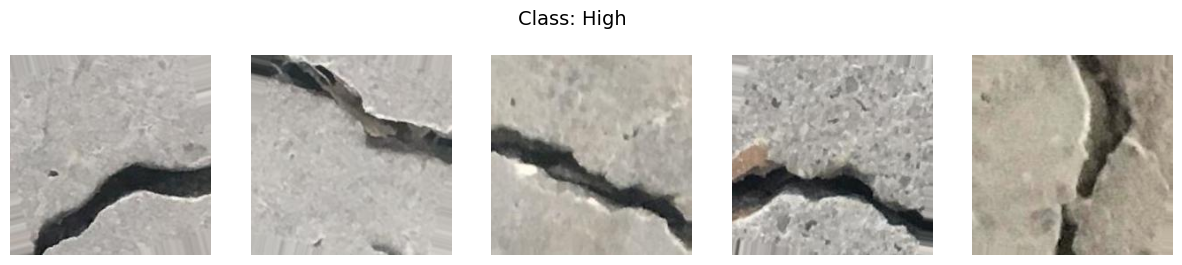

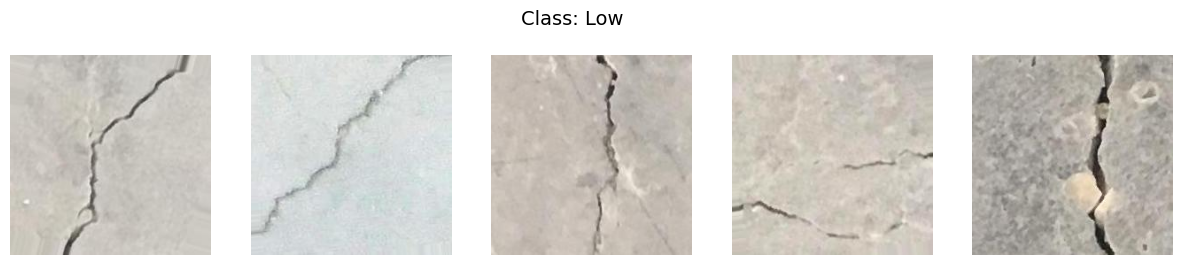

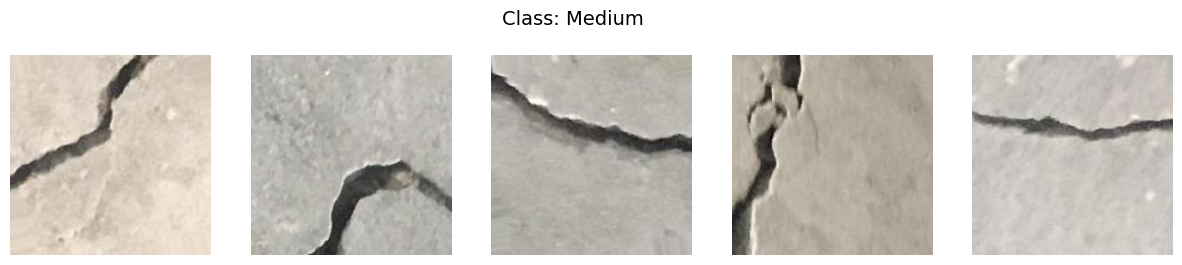

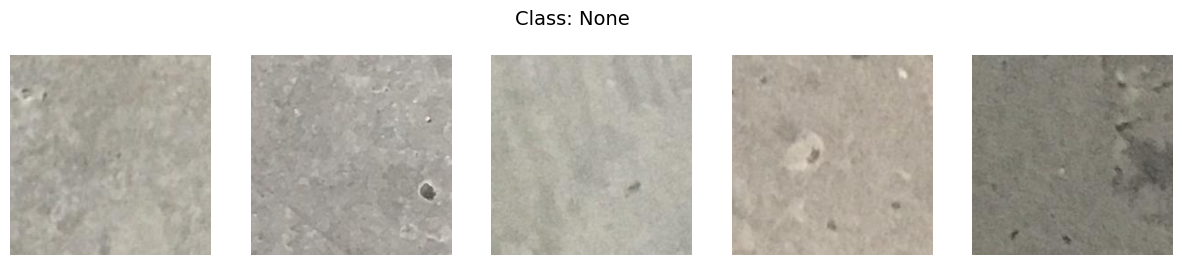

In [ ]:
import matplotlib.pyplot as plt
import cv2, random

def preview_per_class(base_dir, per_class=5):
    for c in sorted(os.listdir(base_dir)):
        c_dir = os.path.join(base_dir, c)
        if not os.path.isdir(c_dir): continue
        files = [os.path.join(c_dir, f) for f in os.listdir(c_dir) if f.lower().endswith(exts)]
        sample = random.sample(files, min(per_class, len(files)))

        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Class: {c}", fontsize=14)
        for i, img_path in enumerate(sample):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, len(sample), i+1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

preview_per_class(TARGET_DIR)


### 2.) Data PreProcessing

In [ ]:
# === CONFIG ===
import os, shutil, random
from PIL import Image, ImageOps, ImageFilter
from tqdm import tqdm

# Source 4-class dataset (each class is a subfolder: None, Low, Medium, High)
SOURCE_DIR = '/content/concrete_cracks_dataset_filtered'

# Output root (will create train/ and val/ here)
OUTPUT_ROOT = '/content/cc_preprocessed'

# Split ratio at the *source-image* level (before augmentation)
TRAIN_FRAC = 0.8  # 80% train / 20% val
RANDOM_SEED = 42
VALID_EXTS = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp')

# Classes to include
CLASSES = ['None', 'Low', 'Medium', 'High']

random.seed(RANDOM_SEED)

# === HELPERS ===
def is_img(fn):
    return fn.lower().endswith(VALID_EXTS)

def edge_enhance(img: Image.Image) -> Image.Image:
    return img.filter(ImageFilter.EDGE_ENHANCE)

def ensure_clean_dir(path):
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

def save_variants(src_path, out_dir_base, stem):
    """
    Create 3 variants (original, vflip, rot90), each with EDGE_ENHANCE.
    Saves as PNG for consistency.
    """
    try:
        img = Image.open(src_path).convert('RGB')
    except Exception as e:
        print(f"[WARN] Failed to open {src_path}: {e}")
        return 0

    # 1) Original + EDGE_ENHANCE
    img1 = edge_enhance(img)
    img1.save(os.path.join(out_dir_base, f"{stem}_orig_edge.png"))

    # 2) Vertical flip + EDGE_ENHANCE
    img2 = edge_enhance(ImageOps.flip(img))
    img2.save(os.path.join(out_dir_base, f"{stem}_vflip_edge.png"))

    # 3) 90° rotation + EDGE_ENHANCE
    img3 = edge_enhance(img.rotate(90, expand=True))
    img3.save(os.path.join(out_dir_base, f"{stem}_rot90_edge.png"))

    return 3

# === SCAN & BALANCE ===
# Collect image paths per class
per_class_files = {}
for c in CLASSES:
    cdir = os.path.join(SOURCE_DIR, c)
    if not os.path.isdir(cdir):
        raise FileNotFoundError(f"Class folder not found: {cdir}")
    files = [os.path.join(cdir, f) for f in os.listdir(cdir) if is_img(f)]
    files.sort()
    per_class_files[c] = files

# Determine balanced count (same number of SOURCE images per class)
min_count = min(len(v) for v in per_class_files.values())
print("Source counts per class:", {k: len(v) for k, v in per_class_files.items()})
print(f"Balanced to min per class = {min_count} source images")

# Sample balanced set for each class (deterministically)
balanced = {c: random.sample(per_class_files[c], min_count) for c in CLASSES}

# Train/Val split (per class)
n_train = int(round(TRAIN_FRAC * min_count))
n_val = min_count - n_train
print(f"Per-class split → train: {n_train}, val: {n_val} (from {min_count})")

splits = {'train': {}, 'val': {}}
for c, files in balanced.items():
    random.shuffle(files)
    splits['train'][c] = files[:n_train]
    splits['val'][c]   = files[n_train:]

# === PREP OUTPUT DIRS ===
train_root = os.path.join(OUTPUT_ROOT, 'train')
val_root   = os.path.join(OUTPUT_ROOT, 'val')
for root in [train_root, val_root]:
    ensure_clean_dir(root)
    for c in CLASSES:
        os.makedirs(os.path.join(root, c), exist_ok=True)

# === PROCESS & SAVE AUGMENTED VARIANTS ===
def build_split(split_name, split_map, out_root):
    total_src = sum(len(split_map[c]) for c in CLASSES)
    print(f"\nBuilding '{split_name}' → {total_src} source images (x3 variants each)")

    saved_counts = {c: 0 for c in CLASSES}
    for c in CLASSES:
        out_dir_c = os.path.join(out_root, c)
        for idx, src_path in enumerate(tqdm(split_map[c], desc=f"{split_name}:{c}", ncols=80)):
            stem = f"{c}_{idx:06d}"
            saved_counts[c] += save_variants(src_path, out_dir_c, stem)
    return saved_counts

train_counts = build_split('train', splits['train'], train_root)
val_counts   = build_split('val',   splits['val'],   val_root)

# === REPORT ===
def count_pngs(root):
    summary = {}
    for c in CLASSES:
        cdir = os.path.join(root, c)
        n = sum(1 for f in os.listdir(cdir) if is_img(f))
        summary[c] = n
    return summary

print("\n=== SUMMARY ===")
print("Train (augmented image files per class):", count_pngs(train_root))
print("Val   (augmented image files per class):", count_pngs(val_root))
print("\nEach source image produced 3 files (orig_edge, vflip_edge, rot90_edge).")
print("Output root:", OUTPUT_ROOT)



Source counts per class: {'None': 5000, 'Low': 5000, 'Medium': 5000, 'High': 5000}
Balanced to min per class = 5000 source images
Per-class split → train: 4000, val: 1000 (from 5000)

Building 'train' → 16000 source images (x3 variants each)


train:High:  15%|████▎                       | 614/4000 [00:33<03:03, 18.45it/s]

### Dataset Test Set Preparation

In [ ]:

# Paths
ZIP_PATH = '/content/drive/MyDrive/Concrete Cracks/DATA_Maguire_20180517_ALL.zip'
EXTRACT_ROOT = '/content/maguire_test_raw'   # raw extraction
OUTPUT_ROOT  = '/content/cc_test_maguire'    # cleaned test set

import os, zipfile, shutil

# Fresh extract
if os.path.exists(EXTRACT_ROOT):
    shutil.rmtree(EXTRACT_ROOT)
os.makedirs(EXTRACT_ROOT, exist_ok=True)

with zipfile.ZipFile(ZIP_PATH, 'r') as z:
    z.extractall(EXTRACT_ROOT)

print("✅ Extracted to:", EXTRACT_ROOT)


✅ Extracted to: /content/maguire_test_raw


In [ ]:
import os

def tree(path, level=2):
    for root, dirs, files in os.walk(path):
        depth = root.replace(path, "").count(os.sep)
        if depth > level:
            continue
        indent = "  " * depth
        print(f"{indent}{os.path.basename(root)}/")
        for f in files[:5]:
            print(f"{indent}  {f}")
        if len(files) > 5:
            print(f"{indent}  ... (+{len(files)-5} files)")

tree(EXTRACT_ROOT, level=2)


maguire_test_raw/
  DATA_Maguire_20180517_ALL/
    ReadMe_SDNET2018 .txt
    SDNET2018.zip


In [ ]:
import os, zipfile, shutil

EXTRACT_ROOT = '/content/maguire_test_raw/DATA_Maguire_20180517_ALL'
SDNET_ZIP = os.path.join(EXTRACT_ROOT, 'SDNET2018.zip')
SDNET_ROOT = '/content/maguire_sdnet2018'

# fresh extract
if os.path.exists(SDNET_ROOT):
    shutil.rmtree(SDNET_ROOT)
os.makedirs(SDNET_ROOT, exist_ok=True)

with zipfile.ZipFile(SDNET_ZIP, 'r') as z:
    z.extractall(SDNET_ROOT)

print("✅ Extracted SDNET2018 to:", SDNET_ROOT)


✅ Extracted SDNET2018 to: /content/maguire_sdnet2018


In [ ]:
import os, shutil, glob
from tqdm import tqdm

# === INPUT (adjust if needed) ===
SDNET_ROOT = '/content/maguire_sdnet2018'   # has D, P, W with CD/UD, CP/UP, CW/UW
OUT_BIN = '/content/cc_test_maguire_binary' # output (Crack/None)

# Clean output
if os.path.exists(OUT_BIN):
    shutil.rmtree(OUT_BIN)
os.makedirs(os.path.join(OUT_BIN, 'Crack'), exist_ok=True)
os.makedirs(os.path.join(OUT_BIN, 'None'),  exist_ok=True)

VALID_EXTS = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp')

# Map of subfolders: crack and non-crack
crack_folders = [
    ('D', 'CD'),  # Deck crack
    ('P', 'CP'),  # Pavement crack
    ('W', 'CW'),  # Wall crack
]
none_folders = [
    ('D', 'UD'),  # Deck uncracked
    ('P', 'UP'),  # Pavement uncracked
    ('W', 'UW'),  # Wall uncracked
]

def collect(src_dir, dst_dir, prefix):
    files = []
    for ext in VALID_EXTS:
        files.extend(glob.glob(os.path.join(src_dir, f'*{ext}')))
    for i, src in enumerate(tqdm(files, desc=f'Copy {prefix}', ncols=80)):
        base = os.path.basename(src)
        name, _ = os.path.splitext(base)
        dst = os.path.join(dst_dir, f'{prefix}_{i:06d}{os.path.splitext(base)[1].lower()}')
        shutil.copy2(src, dst)
    return len(files)

n_crack = 0
for top, sub in crack_folders:
    src = os.path.join(SDNET_ROOT, top, sub)
    if os.path.isdir(src):
        n_crack += collect(src, os.path.join(OUT_BIN, 'Crack'), f'{top}_{sub}')

n_none = 0
for top, sub in none_folders:
    src = os.path.join(SDNET_ROOT, top, sub)
    if os.path.isdir(src):
        n_none += collect(src, os.path.join(OUT_BIN, 'None'), f'{top}_{sub}')

print(f'✅ Maguire binary test set ready at: {OUT_BIN}')
print(f'Counts → Crack: {n_crack} | None: {n_none} | Total: {n_crack + n_none}')


Copy W_UW: 100%|████████████████████████| 14287/14287 [00:01<00:00, 7698.24it/s]

✅ Maguire binary test set ready at: /content/cc_test_maguire_binary
Counts → Crack: 8484 | None: 47608 | Total: 56092


In [ ]:
import os, shutil, glob
from PIL import Image
from tqdm import tqdm

# === INPUT (adjust if needed) ===
SRC_4CLASS = '/content/concrete_cracks_dataset_filtered'  # has None, Low, Medium, High
OUT_ROT270 = '/content/cc_test_rot270_4class'

CLASSES = ['None', 'Low', 'Medium', 'High']
VALID_EXTS = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff', '.webp')

# Clean output
if os.path.exists(OUT_ROT270):
    shutil.rmtree(OUT_ROT270)
for c in CLASSES:
    os.makedirs(os.path.join(OUT_ROT270, c), exist_ok=True)

def img_files_in(folder):
    files = []
    for ext in VALID_EXTS:
        files.extend(glob.glob(os.path.join(folder, f'*{ext}')))
    return files

total = 0
for c in CLASSES:
    src_dir = os.path.join(SRC_4CLASS, c)
    dst_dir = os.path.join(OUT_ROT270, c)
    files = img_files_in(src_dir)
    for i, src in enumerate(tqdm(files, desc=f'Rot270 {c}', ncols=80)):
        try:
            img = Image.open(src).convert('RGB').rotate(270, expand=True)
            base = os.path.basename(src)
            name, _ = os.path.splitext(base)
            out_path = os.path.join(dst_dir, f'{name}_rot270.png')
            img.save(out_path)
            total += 1
        except Exception as e:
            print('[WARN] skip', src, e)

print(f'✅ 270°-rotated test set ready at: {OUT_ROT270}')
print(f'Files written: {total}')


Rot270 High: 100%|██████████████████████████| 5000/5000 [01:37<00:00, 51.28it/s]

✅ 270°-rotated test set ready at: /content/cc_test_rot270_4class
Files written: 20000


### 3.) BCNN Model Training

In [ ]:
!pip -q install torchmetrics

import os, time, random, json, numpy as np
import torch, torch.nn as nn, torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torchmetrics.classification import MulticlassAccuracy, MulticlassConfusionMatrix

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", DEVICE)

# Paths
DATA_ROOT = '/content/cc_preprocessed'              # from your preprocessing step
TRAIN_DIR = f'{DATA_ROOT}/train'
VAL_DIR   = f'{DATA_ROOT}/val'

# Optional tests (set to None if you don’t have them)
ROT270_TEST_DIR = '/content/cc_test_rot270_4class'  # optional 4-class test
MAGUIRE_BIN_DIR = '/content/cc_test_maguire_binary' # optional binary (Crack/None)

CLASSES = ['None', 'Low', 'Medium', 'High']
NUM_CLASSES = len(CLASSES)
IMG_SIZE = 224
BATCH_SIZE = 64
NUM_WORKERS = 2
EPOCHS = 12
LR = 3e-4
CHECKPOINT = '/content/bcnn_mc_dropout_best.pth'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.2 MB/s eta 0:00:00
Device: cpu


In [ ]:
# Normalization (pairs well with ImageNet backbones)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

base_tfms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    normalize,
])

train_ds = datasets.ImageFolder(TRAIN_DIR, transform=base_tfms)
val_ds   = datasets.ImageFolder(VAL_DIR,   transform=base_tfms)

print("Class index map:", train_ds.class_to_idx)
with open('/content/class_index.json','w') as f:
    json.dump(train_ds.class_to_idx, f, indent=2)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=True)


Class index map: {'High': 0, 'Low': 1, 'Medium': 2, 'None': 3}


In [ ]:
class MCResNet18(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES, p_drop=0.3):
        super().__init__()
        m = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        in_feats = m.fc.in_features
        m.fc = nn.Sequential(
            nn.Linear(in_feats, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p_drop),          # dropout stays ON during MC inference
            nn.Linear(512, num_classes),
        )
        self.backbone = m

    def forward(self, x):
        return self.backbone(x)

model = MCResNet18().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
acc_metric = MulticlassAccuracy(num_classes=NUM_CLASSES).to(DEVICE)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 58.8MB/s]


In [ ]:
def run_epoch(loader, training=True):
    model.train(training)
    epoch_loss = 0.0
    acc_metric.reset()
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE, non_blocking=True), yb.to(DEVICE, non_blocking=True)
        if training:
            optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        if training:
            loss.backward()
            optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        acc_metric.update(logits.argmax(1), yb)
    n = len(loader.dataset)
    return epoch_loss/n, acc_metric.compute().item()

best_val = 0.0
for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    tr_loss, tr_acc = run_epoch(train_loader, True)
    va_loss, va_acc = run_epoch(val_loader, False)
    dt = time.time()-t0
    print(f"Epoch {epoch:02d}/{EPOCHS} | "
          f"train_loss {tr_loss:.4f} acc {tr_acc:.4f} | "
          f"val_loss {va_loss:.4f} acc {va_acc:.4f} | {dt:.1f}s")
    if va_acc > best_val:
        best_val = va_acc
        torch.save(model.state_dict(), CHECKPOINT)
        print("  ✅ saved best")
print("Best val acc:", best_val)


NameError: name 'EPOCHS' is not defined

# 4.) VIT Model Training


In [3]:
# === Vision Transformer Training on /content/cc_preprocessed ===
import torch, time
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchmetrics.classification import MulticlassAccuracy

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

# Paths (reused from your preprocessing)
TRAIN_DIR = "/content/cc_preprocessed/train"
VAL_DIR   = "/content/cc_preprocessed/val"
CLASSES   = ["None", "Low", "Medium", "High"]
NUM_CLASSES = len(CLASSES)

# Hyperparams
IMG_SIZE   = 224
BATCH_SIZE = 64
EPOCHS     = 12
LR         = 3e-4

# Same normalization you used for ResNet
normalize = transforms.Normalize(mean=[0.485,0.456,0.406],
                                 std=[0.229,0.224,0.225])

tfms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    normalize,
])

# Datasets & loaders
train_ds = datasets.ImageFolder(TRAIN_DIR, transform=tfms)
val_ds   = datasets.ImageFolder(VAL_DIR,   transform=tfms)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_dl   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print("Class index map:", train_ds.class_to_idx)

# ---- Build ViT ----
vit = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
in_feats = vit.heads.head.in_features
vit.heads.head = nn.Linear(in_feats, NUM_CLASSES)
vit = vit.to(DEVICE)

criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = torch.optim.AdamW(vit.parameters(), lr=LR, weight_decay=1e-4)
acc_metric = MulticlassAccuracy(num_classes=NUM_CLASSES).to(DEVICE)

def run_epoch(dl, train=True):
    vit.train(train)
    total_loss, acc_metric_sum = 0.0, 0
    acc_metric.reset()
    for xb, yb in dl:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        if train: optimizer.zero_grad()
        out = vit(xb)
        loss = criterion(out, yb)
        if train:
            loss.backward()
            optimizer.step()
        total_loss += loss.item() * xb.size(0)
        acc_metric.update(out.argmax(1), yb)
    return total_loss/len(dl.dataset), acc_metric.compute().item()

BEST = 0.0
CKPT = "/content/vit_b16_cracks_best.pth"
for ep in range(1, EPOCHS+1):
    t0=time.time()
    tr_loss, tr_acc = run_epoch(train_dl, True)
    va_loss, va_acc = run_epoch(val_dl, False)
    print(f"ViT Epoch {ep:02d}/{EPOCHS} | "
          f"train {tr_loss:.4f}/{tr_acc:.4f} | "
          f"val {va_loss:.4f}/{va_acc:.4f} | {time.time()-t0:.1f}s")
    if va_acc > BEST:
        BEST = va_acc
        torch.save(vit.state_dict(), CKPT)
        print("  ✓ Saved best model")

print("Best ViT val acc:", BEST)


ModuleNotFoundError: No module named 'torchmetrics'